Look at how echo annotations vary with variables of interest. 

In [1]:
import numpy as np
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# create a database connection
sqluser = 'mimic'
dbname = 'mimic'
schema_name = 'mimiciii'

cur = None

In [72]:
if cur: 
    cur.close()
    con.close()

con = psycopg2.connect(dbname = dbname, user = sqluser)
cur = con.cursor()
cur.execute('SET search_path to ' + schema_name)

In [75]:
query = \
"""
SELECT * FROM echo_features; 
"""
ef = pd.read_sql_query(query, con)
ef.head()

,row_id,icustay_id,hadm_id,subject_id,age_at_intime,gender,height,weight,bmi,ethnicity,...,fluid_daily_balance_ml_1,fluid_chartdate_1,fluid_daily_input_ml_2,fluid_daily_output_ml_2,fluid_daily_balance_ml_2,fluid_chartdate_2,fluid_daily_input_ml_3,fluid_daily_output_ml_3,fluid_daily_balance_ml_3,fluid_chartdate_3
0,83481,200003,163557,27513,17625 days 19:50:04,M,70.0,160.0,22.955102,WHITE,...,-975.0,2199-08-03,NaN,NaN,NaN,None,NaN,NaN,NaN,None
1,99984,200009,129607,29904,17353 days 10:34:32,F,64.0,190.0,32.609863,WHITE,...,4002.0,2189-12-01,NaN,NaN,NaN,None,NaN,NaN,NaN,None
2,99985,200009,129607,29904,17353 days 10:34:32,F,63.0,180.0,31.882086,WHITE,...,4002.0,2189-12-01,NaN,NaN,NaN,None,NaN,NaN,NaN,None
3,71333,200014,127229,9514,30921 days 23:16:48,M,NaN,NaN,NaN,UNKNOWN/NOT SPECIFIED,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None
4,77556,200019,112486,21789,30249 days 09:03:12,F,NaN,NaN,NaN,WHITE,...,456.0,2178-07-08,1970.0,985.0,985.0,2178-07-09,620.0,299.0,321.0,2178-07-10


In [66]:
ef[['icustay_id', 'ed_chartdate', 'fluid_chartdate_1', 'fluid_daily_input_ml_1', 
    'fluid_chartdate_2', 'fluid_daily_input_ml_2', 
    'fluid_chartdate_3', 'fluid_daily_input_ml_3', 
    'outtime']].head()

,icustay_id,ed_chartdate,fluid_chartdate_1,fluid_daily_input_ml_1,fluid_chartdate_2,fluid_daily_input_ml_2,fluid_chartdate_3,fluid_daily_input_ml_3,outtime
0,200003,2199-08-03,2199-08-03,2687.0,None,NaN,None,NaN,2199-08-08 17:09:18
1,200009,2189-12-01,2189-12-01,7900.0,None,NaN,None,NaN,2189-12-02 14:17:37
2,200009,2189-12-01,2189-12-01,7900.0,None,NaN,None,NaN,2189-12-02 14:17:37
3,200014,2105-02-18,None,NaN,None,NaN,None,NaN,2105-02-18 16:53:29
4,200019,2178-07-08,2178-07-08,1400.0,2178-07-09,1970.0,2178-07-10,620.0,2178-07-11 10:28:40


## Demographics

### Age

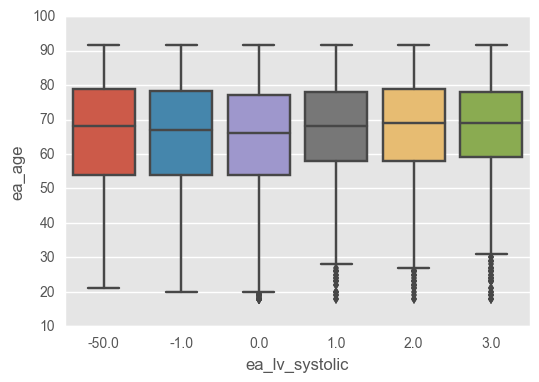

In [31]:
g = sns.boxplot('ea_lv_systolic', 'ea_age', data = ef)

### Sex

gender
F     7944
M    10349
Name: count, dtype: int64

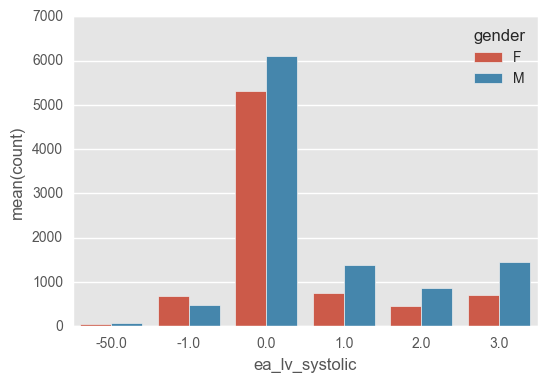

In [30]:
to_plot = ef[['gender', 'ea_lv_systolic', 'subject_id']].dropna().groupby(['gender', 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = ['gender', 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = 'gender')
to_plot.groupby('gender')['count'].sum()

Obvious outliers in some columns:

### Height

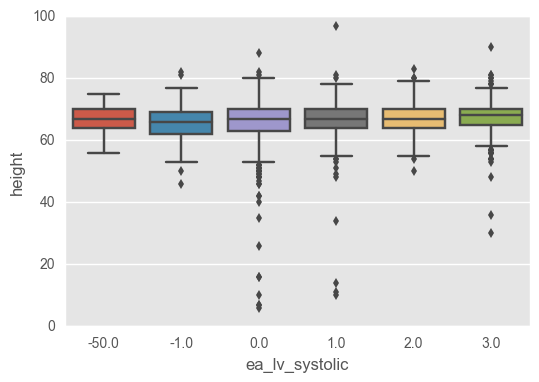

In [32]:
g = sns.boxplot('ea_lv_systolic', 'height', data = ef)

### Weight

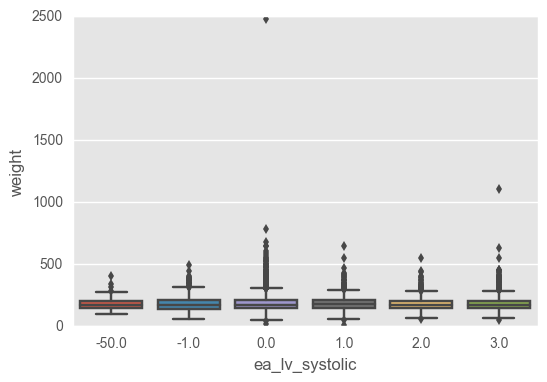

In [33]:
g = sns.boxplot('ea_lv_systolic', 'weight', data = ef)

### BMI

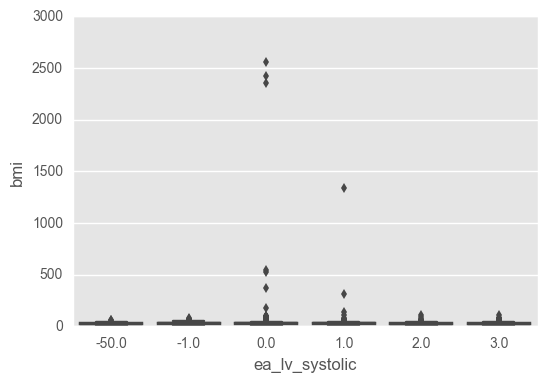

In [34]:
g = sns.boxplot('ea_lv_systolic', 'bmi', data = ef)

## Race

In [38]:
to_plot = ef[['ethnicity', 'ea_lv_systolic', 'subject_id']].dropna().groupby(['ethnicity', 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = ['ethnicity', 'ea_lv_systolic', 'count']

#sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = 'ethnicity')
to_plot.groupby('ethnicity')['count'].sum()

ethnicity
AMERICAN INDIAN/ALASKA NATIVE                     7
ASIAN                                           251
ASIAN - ASIAN INDIAN                             37
ASIAN - CAMBODIAN                                 7
ASIAN - CHINESE                                  85
ASIAN - FILIPINO                                  6
ASIAN - JAPANESE                                  2
ASIAN - KOREAN                                    5
ASIAN - OTHER                                     8
ASIAN - THAI                                      1
ASIAN - VIETNAMESE                               13
BLACK/AFRICAN                                     9
BLACK/AFRICAN AMERICAN                         1439
BLACK/CAPE VERDEAN                               52
BLACK/HAITIAN                                    21
CARIBBEAN ISLAND                                  1
HISPANIC OR LATINO                              466
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)        1
HISPANIC/LATINO - COLOMBIAN                       4
HI

## Filters

### On vasopressors

ps_vaso
False    9585
True     8708
Name: count, dtype: int64

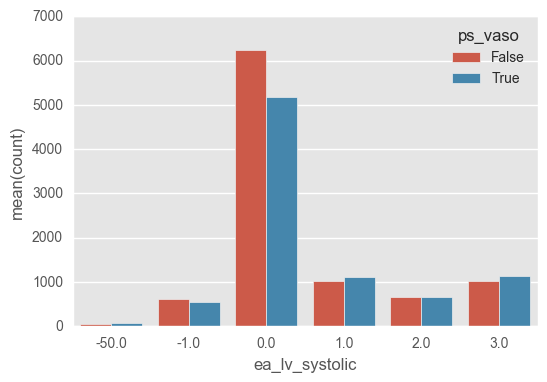

In [68]:
var = 'ps_vaso'

to_plot = ef[[var, 'ea_lv_systolic', 'subject_id']].dropna().groupby([var, 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = [var, 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = var)
to_plot.groupby(var)['count'].sum()

### Chronic dialysis

chronic_dialysis_flg
False    17010
True      1283
Name: count, dtype: int64

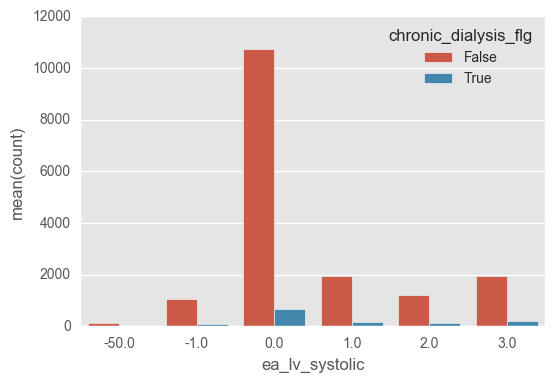

In [76]:
var = 'chronic_dialysis_flg'

to_plot = ef[[var, 'ea_lv_systolic', 'subject_id']].dropna().groupby([var, 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = [var, 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = var)
to_plot.groupby(var)['count'].sum()

### Excluded diagnosis

diag_xc
False     4424
True     13869
Name: count, dtype: int64

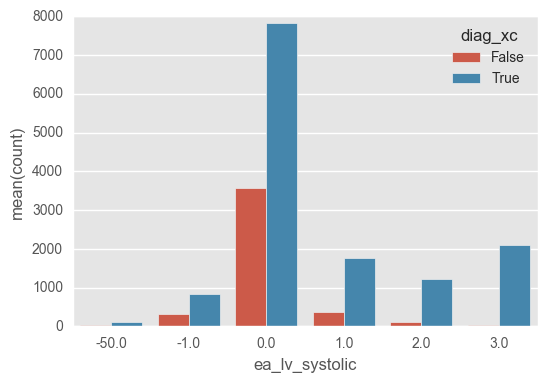

In [78]:
var = 'diag_xc'

to_plot = ef[[var, 'ea_lv_systolic', 'subject_id']].dropna().groupby([var, 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = [var, 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = var)
to_plot.groupby(var)['count'].sum()

## Outcomes

survived_icustay
False    2277
True     6041
Name: count, dtype: int64

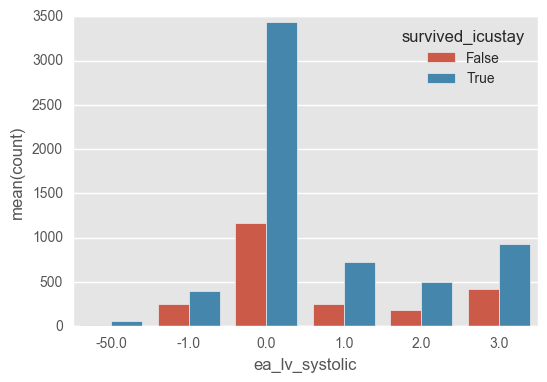

In [79]:
var = 'survived_icustay'

to_plot = ef[[var, 'ea_lv_systolic', 'subject_id']].dropna().groupby([var, 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = [var, 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = var)
to_plot.groupby(var)['count'].sum()

survived_hadm
False    2739
True     5579
Name: count, dtype: int64

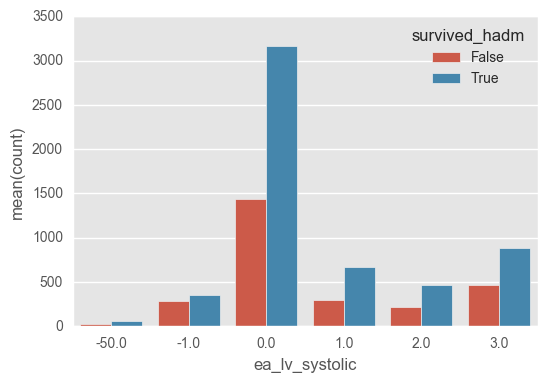

In [80]:
var = 'survived_hadm'

to_plot = ef[[var, 'ea_lv_systolic', 'subject_id']].dropna().groupby([var, 'ea_lv_systolic'])['subject_id'].count().reset_index()
to_plot.columns = [var, 'ea_lv_systolic', 'count']

sns.barplot('ea_lv_systolic', 'count', data = to_plot, hue = var)
to_plot.groupby(var)['count'].sum()

## Labs

### Creatinine

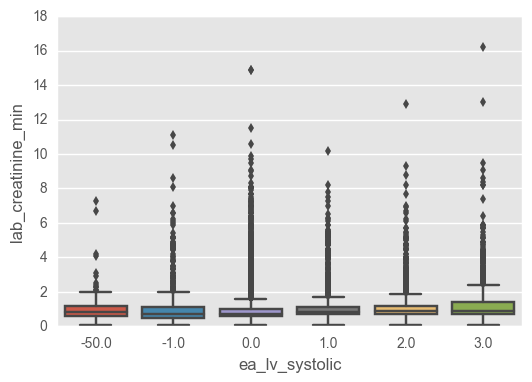

In [84]:
g = sns.boxplot('ea_lv_systolic', 'lab_creatinine_min', data = ef)

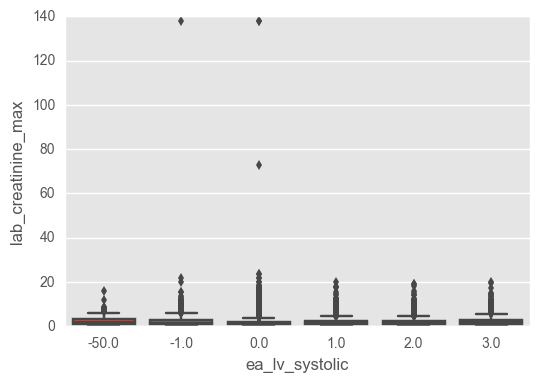

In [85]:
g = sns.boxplot('ea_lv_systolic', 'lab_creatinine_max', data = ef)

### Hematocrit

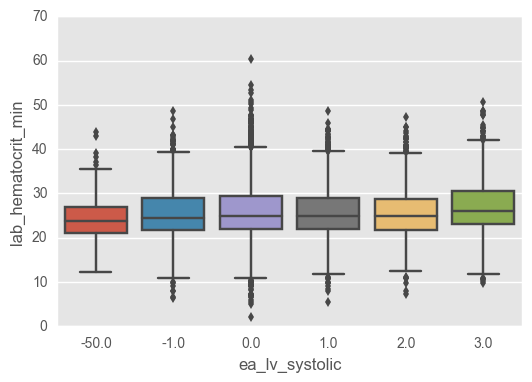

In [88]:
g = sns.boxplot('ea_lv_systolic', 'lab_hematocrit_min', data = ef)

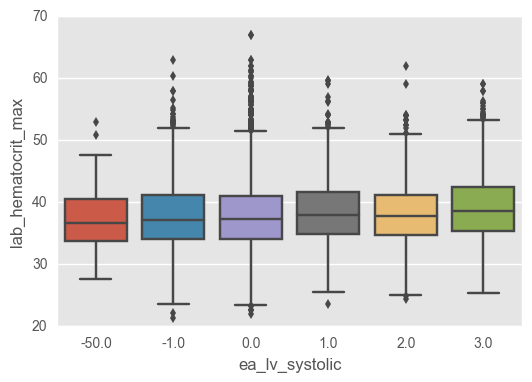

In [89]:
g = sns.boxplot('ea_lv_systolic', 'lab_hematocrit_max', data = ef)

### White Blood Cells

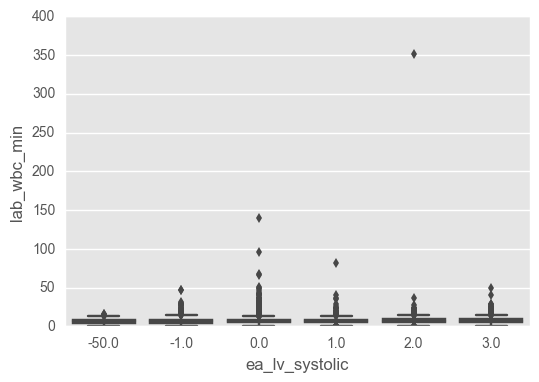

In [90]:
g = sns.boxplot('ea_lv_systolic', 'lab_wbc_min', data = ef)

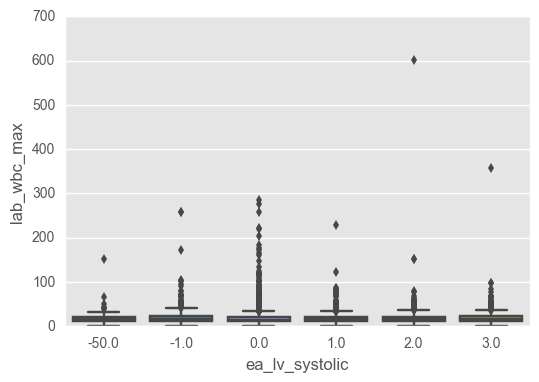

In [91]:
g = sns.boxplot('ea_lv_systolic', 'lab_wbc_max', data = ef)

## Questions

### Did presence/absence of an echo affect trends of fluid management? How did the echo affect the trend of fluid management?

For the first question, we actually need to get information of all patients in the ICU who did not have an echo. 

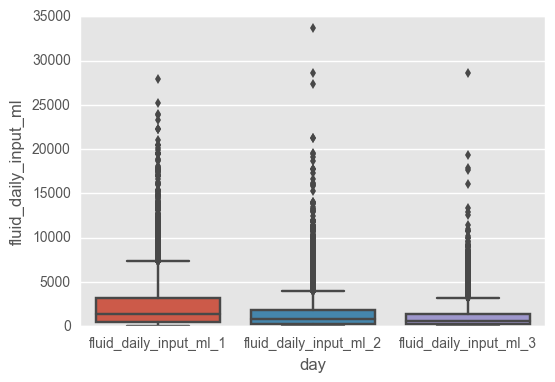

In [106]:
fluid_var = 'fluid_daily_input_ml'
to_plot = ef[[fluid_var + '_1', fluid_var + '_2', fluid_var + '_3']].unstack().reset_index()
to_plot.columns = ['day', 'row_id', fluid_var]

sns.boxplot(data = to_plot, x = 'day', y = fluid_var)

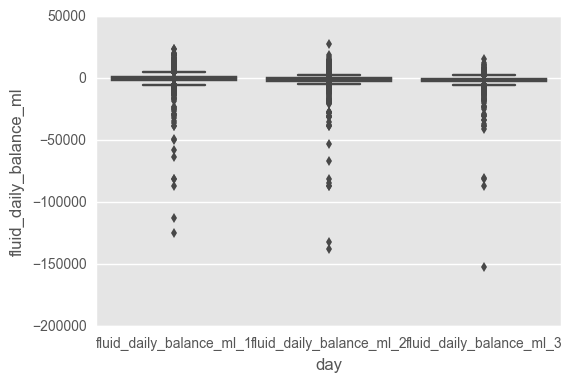

In [107]:
fluid_var = 'fluid_daily_balance_ml'
to_plot = ef[[fluid_var + '_1', fluid_var + '_2', fluid_var + '_3']].unstack().reset_index()
to_plot.columns = ['day', 'row_id', fluid_var]

sns.boxplot(data = to_plot, x = 'day', y = fluid_var)